<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Estatística
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Média e Variância;</li>
  <li>Ordem e Posição;</li>
  <li>Correlação.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

### **0.1. Dados** 

Neste módulo, vamos utilizar dados sobre o salário mensal em dólares americados de jogadores da NBA em 2020. O conjunto de dados está neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/wage.csv) e foi inspirado num conjunto de dados do Kaggle, presente neste [link](https://www.kaggle.com/isaienkov/nba2k20-player-dataset). 

 - **Download**

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/wage.csv" -O wage.csv 

 - **Manipulação** 

Vamos ler o arquivo `wage.csv` com ajuda do Pandas e converter a coluna de interesse do *dataframe* para um *array* NumPy. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
wage_df = pd.read_csv('wage.csv')
wage_df.head()

,wage
0,1750000
1,400641
2,118071
3,811033
4,181193


In [16]:
wage_array = np.array(wage_df['wage'].astype('int').to_list())
print(wage_array[0:7]) #7 primeiros elementos

[1750000  400641  118071  811033  181193 2257751  291666]


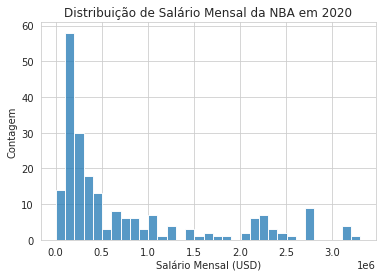

In [18]:
with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=wage_array, binwidth=100 * 1000)
  grafico.set(title='Distribuição de Salário Mensal da NBA em 2020', xlabel='Salário Mensal (USD)', ylabel='Contagem');

## 1\. Média e Variância

### **1.1. População e amostra** 

**População** é um subconjunto composto por **todos** os elementos de um conjunto. Já a **amostra** é um subconjunto composto por uma **fração** dos elementos de um conjunto. O processo de extrair uma amostra de uma população é chamado de **amostragem**. A amostragem é um processo muitas vezes necessário devido a impraticidade do acesso a toda a população (tempo, recursos, etc.).

- Exemplo:

A cidade de São Paulo possuía **8.986.687** de eleitores aptos a votar nas eleições municipais de 2020, segundo o tribunal regional eleitoral do estado. ([link](https://agenciabrasil.ebc.com.br/eleicoes-2020/noticia/2020-11/com-33-milhoes-de-eleitores-sp-e-maior-colegio-eleitoral-do-brasil)). Contudo, o Datafolha fez uma pesquisa de intenção de voto com apenas **1.512** (0.017% do toal) na cidade de São Paulo com 95% de nível de confiança. ([link](https://g1.globo.com/sp/sao-paulo/eleicoes/2020/noticia/2020/11/11/pesquisa-datafolha-em-sao-paulo-covas-32percent-boulos-16percent-russomanno-14percent-franca-12percent.ghtml)).

 - Exemplo:

In [ ]:
len(wage_array)

214

### **1.2. Média** 

A média ($\textbf{x}_m$) é o valor médio ou média aritmética dos elementos ($x_i$) um conjunto ($\textbf{x}$). É definido como a soma dos valores dos elementos divido pelo quantidade dos elementos do conjunto ($n$). Quanto maior for o número de elementos de uma amostra, mais próxima a **média amostral** será da **média populacional**.

> $\textbf{x}_m = \frac{\sum_{i=1}^{n} x_i}{n}$

Exemplo:

In [19]:
np.mean(wage_array) # em USD

762359.6074766355

### **1.3. Variância** 

A variância ($\sigma^{2}$) é uma métrica de dispersão representada pelo quadrado do desvio médio dos elementos ($x_i$) de um conjunto da sua média ($\textbf{x}_m$). É definida como a média da soma dos quadrados da diferença dos valores dos elementos de um conjunto da sua média, corrigidos por um fator amostral.

> **Nota**: Elevar ao quadrado as diferenças evitam que valores negativos impactem a soma.

> $\sigma^{2} = \frac{\sum_{i=1}^{n} (x_i-x_m)^{2}}{n-1}$

Exemplo:

In [ ]:
np.var(wage_array) # em USD²

748444533449.9955

### **1.4. Desvio Padrão** 

O desvio padrão ($\sigma$) é uma métrica de dispersão representada pela raiz quadrada da variância. Possuí a mesma dimensão da média.

> $\sigma = \sqrt{\sigma^{2}}$

Exemplo:

In [20]:
np.std(wage_array) # em USD

865126.8886411955

## 2\. Ordem e posição

### **2.1. Medição Posicional** 

As métricas posicionais assumem que os elementos de um conjunto estejam **ordenados** do menor para o maior valor. São muito utilizados pois são mais resilientes a distorção (*skewness*) da distribuição dos valores dos elementos do conjunto.

### **2.2. Mediana** 

A mediana é o valor do elemento central de um conjunto ordenado. Quando a quantidade de elementos é par, a mediana é a média dos seus valores. Passa a ideia do valor dos **elementos mais comuns** do conjunto.

In [21]:
np.median(wage_array)

339000.0

### **2.3. Quartil** 

Quartil é o valor de corte de uma divisão dos elementos de um conjunto. Os quartis que dividem os elementos em 25%, 50% e 75% possuem nomes especiais: primeiro quartil, segundo quartil (mediana) e terceiro quartil, respectivamente. Passam a ideia da **distribuição dos valores dos elementos** do conjunto. 

In [22]:
q1 = np.quantile(wage_array, 0.25) # primeiro quartil ou 25%
print(q1)

165079.0


In [23]:
q2 = np.quantile(wage_array, 0.50) # segundo quartil ou 50% ou mediana
print(q2)

339000.0


In [24]:
q3 = np.quantile(wage_array, 0.75) # terceiro quartil ou 75%
print(q3)

1007752.0


In [27]:
iqr = q3 - q1
print(iqr)

842673.0


### **2.4. Boxplot** 

Gráfico de distribuição que utiliza as métricas posicionais **mediana** e os **quartis**. O gráfico é divido na caixa ou *box*, bigodes ou *whiskers* e os pontos fora da curva ou *outliers*. 

 - **Box**

Apresenta a maior concentração de dados, é definido com o intervalo entre o primeiro e o terceiro quartil, o chamado intervalo entre quartis (IQR). Trás ainda a mediana ou segundo quartil. São representados por uma caixa.

 - **Whiskers**


Apresentam a dispersão dos dados, são geralmente definidos como `Q1 - 1.5 * IQR` (inferior) e `Q3 + 1.5 * IQR` (superior). São conhecidos como mínimo e máximo valores, excluindo os *outliers*. São representados por linhas verticais.

 - **Outliers**

Os famosos pontos fora da curva, são definidos como qualquer valor abaixo ou acima dos *whiskers*. São representados por pontos.

Exemplo:

As métricas **aritméticas** (em USD) são:

- **Média**: 762.359,61
- **Desvio Padrão**: 865.126,89

Já as métricas **posicionais** (em USD) são:

- **Mediana**: 339.000,00
- **1º Quartil**: 165.079,00
- **3º Quartil**: 1.007.752,00


Vamos gerar um gráfico boxplot como o pacote Seaborn:

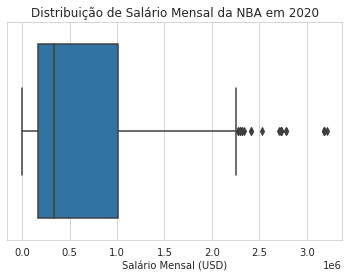

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=wage_array)
  grafico.set(title='Distribuição de Salário Mensal da NBA em 2020', xlabel='Salário Mensal (USD)');

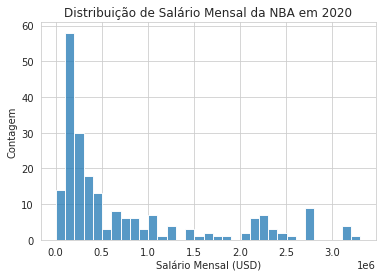

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=wage_array, binwidth=100 * 1000)
  grafico.set(title='Distribuição de Salário Mensal da NBA em 2020', xlabel='Salário Mensal (USD)', ylabel='Contagem');

Algumas conclusões:

 > Métricas **aritméticas** são de simples interpretação mas exigem dados relativamente simétricos para serem representativos.

 > Métricas **posicionais** menos interpretáveis mas são mais genéricas com relação a distribuição dos dados.

## 3\. Correlação

Correlação são métricas que medem a dependência estatística entre conjuntos de dados, correlações estas que podem ser **causais** ou não.

 - Exemplo:

Sobe o preço do dólar, sobe o preço de insumos importados, sobre o preço dos produtos, logo, sobe a inflação.

### **3.1. Coeficiente de Correlação de Pearson** 

O coeficiente de correlação de Pearson ($\textbf{r}_{xy}$) resume a correlação linear entre dois conjuntos de dados em um único número entre -1 e 1, sendo que:

 - $\textbf{r}_{xy} < 0 $, enquanto **x** cresce, **y**  decresce;
 - $\textbf{r}_{xy} = 0 $, não há relação entre **x** e **y**;
 - $\textbf{r}_{xy} > 0 $, enquanto **x** cresce, **y** cresce.

> $\textbf{r}_{xy} = \frac{\sum_{i=1}^{n} (x_i-x_m)(y_i-y_m)}{\sqrt{\sum_{i=1}^{n} (x_i-x_m)^{2}}\sqrt{\sum_{i=1}^{n} (y_i-y_m)^{2}}}$

Exemplo:

In [28]:
%%writefile nba.csv
height;weight;wage
2.01;86.2;17150000
1.93;106.1;898310
2.11;120.2;9881598
1.88;85.7;15643750
1.88;84.8;2875000
2.11;106.1;2376840
1.98;86.6;2625717
2.08;104.3;37199000
2.03;117.9;28942830
1.83;81.6;522738

Writing nba.csv


In [29]:
df = pd.read_csv('nba.csv', sep=';')

In [30]:
df.head()

,height,weight,wage
0,2.01,86.2,17150000
1,1.93,106.1,898310
2,2.11,120.2,9881598
3,1.88,85.7,15643750
4,1.88,84.8,2875000


In [31]:
height_array = np.array(df['height'].to_list())
weight_array = np.array(df['weight'].to_list())
wage_array = np.array(df['wage'].to_list())

In [32]:
weight_array

array([ 86.2, 106.1, 120.2,  85.7,  84.8, 106.1,  86.6, 104.3, 117.9,
        81.6])

 - **Peso e altura**

In [33]:
np.corrcoef(weight_array, height_array)

array([[1.        , 0.73782414],
       [0.73782414, 1.        ]])

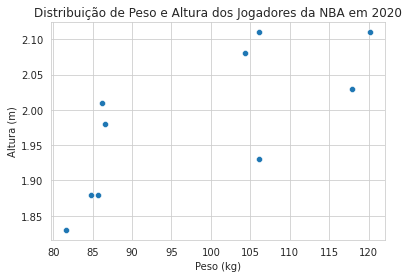

In [34]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=weight_array, y=height_array)
  grafico.set(title='Distribuição de Peso e Altura dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Altura (m)');

 - **Peso e salário**

In [35]:
np.corrcoef(weight_array, wage_array)

array([[1.        , 0.34965527],
       [0.34965527, 1.        ]])

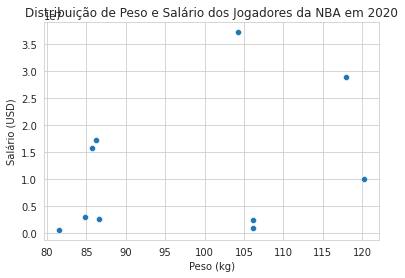

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=weight_array, y=wage_array)
  grafico.set(title='Distribuição de Peso e Salário dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Salário (USD)');

- **Altura e salário**

In [ ]:
np.corrcoef(height_array, wage_array)

array([[1.        , 0.41296351],
       [0.41296351, 1.        ]])

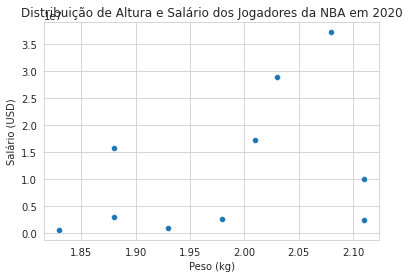

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=height_array, y=wage_array)
  grafico.set(title='Distribuição de Altura e Salário dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Salário (USD)');